# Intel Image Classification Dataset From Kaggle

## 1. Importing the Libraries

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## 2. Preprocessing the Datasets

In [3]:
from tensorflow.keras.applications.vgg16 import preprocess_input

In [4]:
Train_datagen=ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, preprocessing_function=preprocess_input)
Training_Set=Train_datagen.flow_from_directory('D:/ML_Projects/Intel_Image_Classification/seg_train', target_size=(224, 224), batch_size=64, class_mode='categorical')

Found 14034 images belonging to 6 classes.


In [5]:
Test_datagen=ImageDataGenerator(rescale=1/255, preprocessing_function=preprocess_input)
Test_Set=Test_datagen.flow_from_directory('D:/ML_Projects/Intel_Image_Classification/seg_test', target_size=(224, 224), batch_size=64, class_mode='categorical')

Found 3000 images belonging to 6 classes.


## 3. Building the VGG-16 Model

In [6]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg16 import VGG16

In [7]:
vgg=VGG16(input_shape=(224, 224, 3), weights='imagenet', include_top=False)
for layer in vgg.layers:
    layer.trainable=False

In [8]:
x=Flatten()(vgg.output)
DL=Dense(6, activation='softmax')(x)

In [9]:
model=Model(inputs=vgg.input, outputs=DL)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

## 4. History_Data

In [11]:
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')

## 5. Compiling and Fitting

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(Training_Set, validation_data=(Test_Set), epochs=4, steps_per_epoch=len(Training_Set), validation_steps=len(Test_Set))

Epoch 1/4
220/220 [==============================] - 3099s 14s/step - loss: 0.6440 - accuracy: 0.7578 - val_loss: 0.3510 - val_accuracy: 0.8733
Epoch 2/4
220/220 [==============================] - 3131s 14s/step - loss: 0.3227 - accuracy: 0.8894 - val_loss: 0.3863 - val_accuracy: 0.8670
Epoch 3/4
220/220 [==============================] - 3117s 14s/step - loss: 0.2540 - accuracy: 0.9070 - val_loss: 0.3325 - val_accuracy: 0.8917
Epoch 4/4
220/220 [==============================] - 3145s 14s/step - loss: 0.2209 - accuracy: 0.9216 - val_loss: 0.3338 - val_accuracy: 0.8883


In [13]:
from tensorflow.keras.models import load_model
model.save('model_vgg16_Intel_Image_Classification.h5')

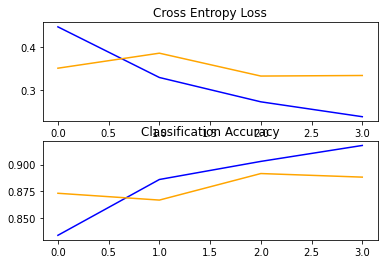

In [14]:
summarize_diagnostics(history=history)

## 6. Predictions

### 1st Prediction

In [15]:
from keras.preprocessing import image
from PIL import Image

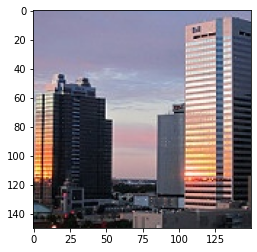

In [16]:
import matplotlib.image as mpimg
img=mpimg.imread('D:/ML_Projects/Intel_Image_Classification/seg_pred/5.jpg')
imgplot=plt.imshow(img)
plt.show()

In [17]:
image_1=Image.open('D:/ML_Projects/Intel_Image_Classification/seg_pred/5.jpg')
print(image_1.size)
new_image=image_1.resize((224, 224))
print(new_image.size)

(150, 150)
(224, 224)


In [18]:
Pred_image=image.img_to_array(new_image)
Pred_image=np.expand_dims(Pred_image, axis=0)
result=model.predict(Pred_image)
result=result.reshape(-1)
max=result[0]
pred=0
for i in range(0, len(result)):
    if(result[i]>max):
        pred=i
        max=result[i]
print(pred)

0


### 2nd Prediction

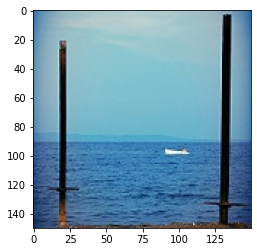

In [19]:
img=mpimg.imread('D:/ML_Projects/Intel_Image_Classification/seg_pred/1785.jpg')
imgplot=plt.imshow(img)
plt.show()

In [21]:
image_2=Image.open('D:/ML_Projects/Intel_Image_Classification/seg_pred/1785.jpg')
print(image_2.size)
new_image_2=image_2.resize((224, 224))
print(new_image_2.size)

(150, 150)
(224, 224)


In [22]:
Pred_image_2=image.img_to_array(new_image_2)
Pred_image_2=np.expand_dims(Pred_image_2, axis=0)
result_2=model.predict(Pred_image_2)
result_2=result_2.reshape(-1)
max_2=result_2[0]
pred_2=0
for i in range(0, len(result_2)):
    if(result_2[i]>max_2):
        pred_2=i
        max_2=result_2[i]
print(pred_2)

4
